**Insurance Claim Fraud Detection:**

Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

Independent Variables:

1.	months_as_customer: Number of months of patronage

2.	age: the length of time a customer has lived or a thing has existed

3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit

7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss

8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

10.	insured_zip: It is the zip code where the insurance was made

11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions

12.	insured_education_level: This refers to the Level of education of the customer

13.	insured_occupation: This refers Occupation of the customer

14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership

16.	capital-gains: This refers to profit accrued due to insurance premium

17.	capital-loss:  refers to the losses incurred due to insurance claims

18.	incident_date: refers to the date which claims where made by customers

19.	incident_type:refers to type of claim/vehicle damage made by customer

20.	collision_type: This refers to the area of damage on the vehicle

21.	incident_severity: This refers to the extent/level of damage

22.	authorities_contacted: refers to gov. agencies contacted after damage

23.	incident_state: This refers to the state at which the accident happened

24.	incident_city: This refers to the city at which the accident happened

25.	1ncident_location:refers to the location at which the accident happened

26.	incident_hour_of_the_day:  period of the day which accident took place

27.	number_of_vehicles_involved: refers to no. of vehicles involved

28.	property_damage: This refers to whether property was damaged or not

29.	bodily_injuries: This refers to injuries sustained

30.	witnesses: This refers to the number of witnesses involved

31.	police_report_available: the report on damage was documented or not

32.	total_claim_amount: financial implications involved in claims

33.	injury_claim: This refers to physical injuries sustained

34.	property_claim: This refers to property damages during incident

35.	vehicle_claim: This refers to property damages during incident

36.	auto_make: This refers to the make of the vehicle

37.	auto_model: This refers to the model of the vehicle

38.	auto_year: year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported

Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


In [151]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [152]:
# read & store the data in DF

df_raw = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df_raw.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [153]:
# Shape of the dataset
print("Rows, column",df_raw.shape)

# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

Rows, column (1000, 40)
months_as_customer : 391 , type: int64 , Null Count: 0
age : 46 , type: int64 , Null Count: 0
policy_number : 1000 , type: int64 , Null Count: 0
policy_bind_date : 951 , type: object , Null Count: 0
policy_state : 3 , type: object , Null Count: 0
policy_csl : 3 , type: object , Null Count: 0
policy_deductable : 3 , type: int64 , Null Count: 0
policy_annual_premium : 991 , type: float64 , Null Count: 0
umbrella_limit : 11 , type: int64 , Null Count: 0
insured_zip : 995 , type: int64 , Null Count: 0
insured_sex : 2 , type: object , Null Count: 0
insured_education_level : 7 , type: object , Null Count: 0
insured_occupation : 14 , type: object , Null Count: 0
insured_hobbies : 20 , type: object , Null Count: 0
insured_relationship : 6 , type: object , Null Count: 0
capital-gains : 338 , type: int64 , Null Count: 0
capital-loss : 354 , type: int64 , Null Count: 0
incident_date : 60 , type: object , Null Count: 0
incident_type : 4 , type: object , Null Count: 0
collis

*_C39 has all null value: Dropping it*

*policy_number, incident_location has all different values: dropping it*

*Policy_bind_date, incident_date: is just date: Dropping it as there is no timeseries analysis invlolved*

In [154]:
# Dropping the above mentioned columns

df_raw.drop(['policy_number','policy_bind_date','_c39','incident_date','incident_location'], axis=1, inplace=True)

df_raw.sample(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
282,201,40,OH,250/500,2000,1315.56,0,471806,FEMALE,PhD,...,0,YES,6820,1240,1240,4340,Jeep,Grand Cherokee,2003,N
712,456,62,OH,250/500,1000,1395.77,0,611651,FEMALE,MD,...,3,NO,66480,5540,11080,49860,Saab,92x,2012,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

<Axes: >

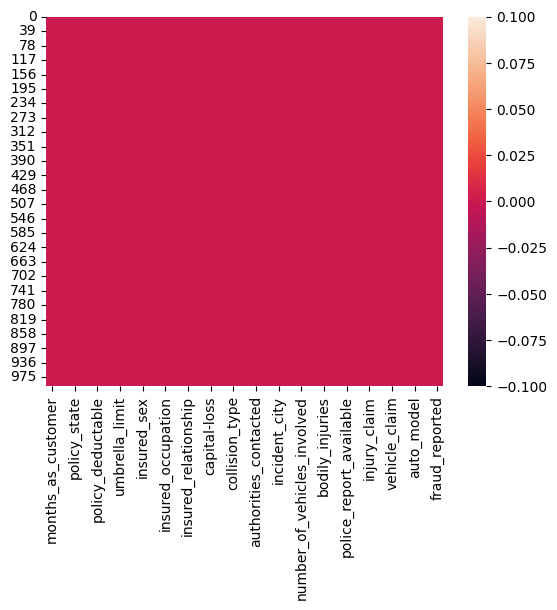

In [155]:
# Checking non null value count & visulaizing using Heat Map

df_raw.info()
sns.heatmap(df_raw.isnull())

**NO NULL VALUES IN ANY LABEL**

In [156]:
# CHECKING COLUMNS WHERE LABEL ENCODING IS NEEDED

# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype)

months_as_customer : 391 , type: int64
age : 46 , type: int64
policy_state : 3 , type: object
policy_csl : 3 , type: object
policy_deductable : 3 , type: int64
policy_annual_premium : 991 , type: float64
umbrella_limit : 11 , type: int64
insured_zip : 995 , type: int64
insured_sex : 2 , type: object
insured_education_level : 7 , type: object
insured_occupation : 14 , type: object
insured_hobbies : 20 , type: object
insured_relationship : 6 , type: object
capital-gains : 338 , type: int64
capital-loss : 354 , type: int64
incident_type : 4 , type: object
collision_type : 4 , type: object
incident_severity : 4 , type: object
authorities_contacted : 5 , type: object
incident_state : 7 , type: object
incident_city : 7 , type: object
incident_hour_of_the_day : 24 , type: int64
number_of_vehicles_involved : 4 , type: int64
property_damage : 3 , type: object
bodily_injuries : 3 , type: int64
witnesses : 4 , type: int64
police_report_available : 3 , type: object
total_claim_amount : 763 , type:

**From observation it can be concluded that Label Encoding needs to be done where unique count is below 50, as they are categorical labels**

In [157]:
# Apply LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for index in df_raw.columns.to_list():

  if df_raw[index].nunique()<40:
    df_raw[index] = le.fit_transform(df_raw[index])

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype)

df_raw.head(2)

months_as_customer : 391 , type: int64
age : 46 , type: int64
policy_state : 3 , type: int64
policy_csl : 3 , type: int64
policy_deductable : 3 , type: int64
policy_annual_premium : 991 , type: float64
umbrella_limit : 11 , type: int64
insured_zip : 995 , type: int64
insured_sex : 2 , type: int64
insured_education_level : 7 , type: int64
insured_occupation : 14 , type: int64
insured_hobbies : 20 , type: int64
insured_relationship : 6 , type: int64
capital-gains : 338 , type: int64
capital-loss : 354 , type: int64
incident_type : 4 , type: int64
collision_type : 4 , type: int64
incident_severity : 4 , type: int64
authorities_contacted : 5 , type: int64
incident_state : 7 , type: int64
incident_city : 7 , type: int64
incident_hour_of_the_day : 24 , type: int64
number_of_vehicles_involved : 4 , type: int64
property_damage : 3 , type: int64
bodily_injuries : 3 , type: int64
witnesses : 4 , type: int64
police_report_available : 3 , type: int64
total_claim_amount : 763 , type: int64
injury_c

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1,1406.91,1,466132,1,4,...,2,2,71610,6510,13020,52080,10,1,9,1
1,228,42,1,1,2,1197.22,5,468176,1,4,...,0,0,5070,780,780,3510,8,12,12,1


Categorical Columns have been encoded

# GRAPHICAL ANALYSIS

UNIVARIATE

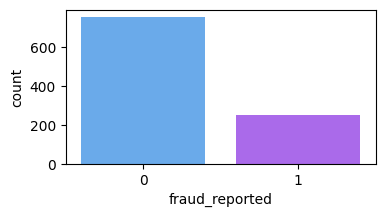

0    753
1    247
Name: fraud_reported, dtype: int64


In [158]:
# CHECKING COUNT DISTRIBUTION OF TARGET LABEL : fraud_reported

mp.figure(figsize=(4,2))
sns.countplot(x=df_raw['fraud_reported'], palette = 'cool')
mp.show()

print(df_raw['fraud_reported'].value_counts())

**Data is imbalanced , applying SMOTE**

In [159]:
# Import & apply SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X = df_raw.iloc[:,:-1]
y = df_raw['fraud_reported']

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)

df_ins_bal = pd.DataFrame(data = X_resampled, columns = df_raw.columns.to_list())
df_ins_bal['fraud_reported'] = y_resampled

print(df_ins_bal.shape)
df_ins_bal.head(4)

(1000, 34)
(1000,)
(1506, 34)
(1506,)
(1506, 35)


,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1,1406.91,1,466132,1,4,...,2,2,71610,6510,13020,52080,10,1,9,1
1,228,42,1,1,2,1197.22,5,468176,1,4,...,0,0,5070,780,780,3510,8,12,12,1
2,134,29,2,0,2,1413.14,5,430632,0,6,...,3,1,34650,7700,3850,23100,4,30,12,0
3,256,41,0,1,2,1415.74,6,608117,0,6,...,2,1,63400,6340,6340,50720,3,34,19,1


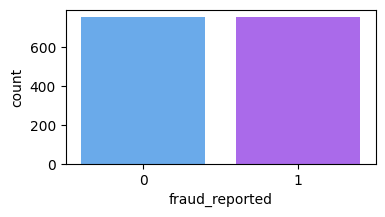

1    753
0    753
Name: fraud_reported, dtype: int64


In [160]:
# Re-Check Distribution of the target label

mp.figure(figsize=(4,2))
sns.countplot(x=df_ins_bal['fraud_reported'], palette = 'cool')
mp.show()

print(df_ins_bal['fraud_reported'].value_counts())

# GRAPHICAL ANALYSIS - UNIVARIATE

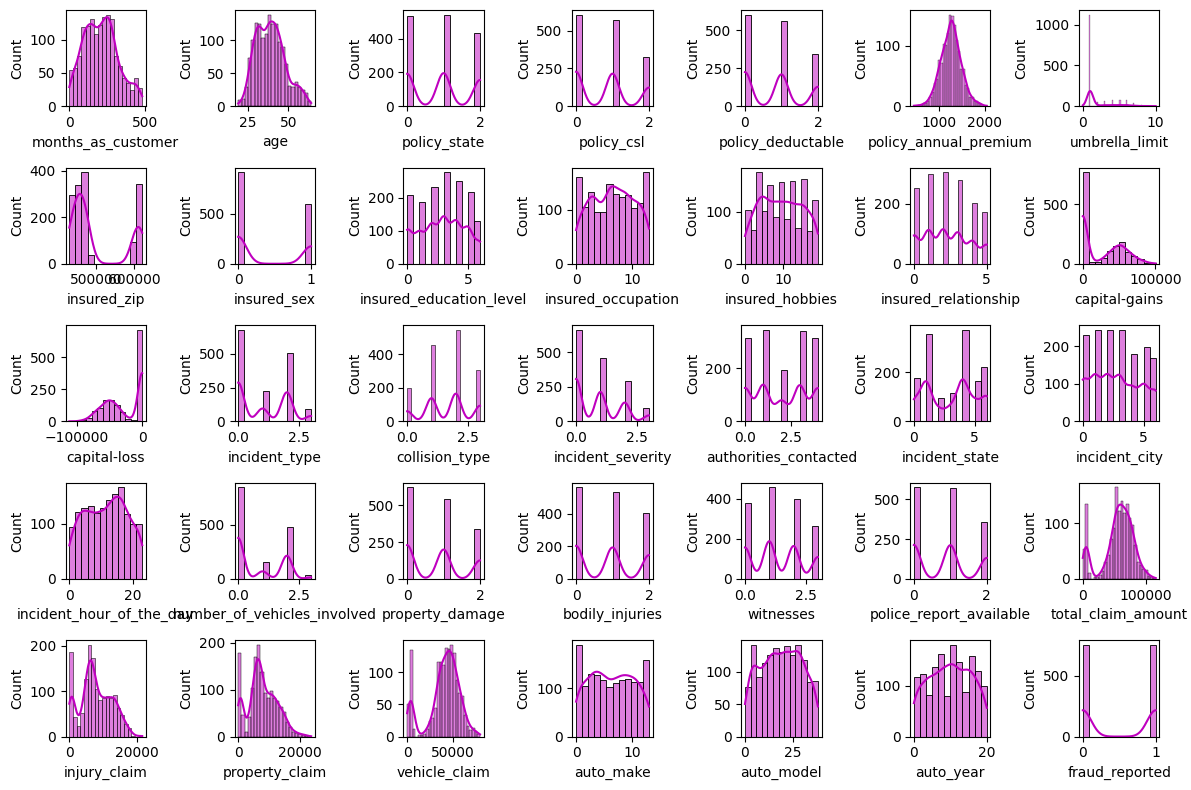

In [161]:
# Histplot to check distribution

mp.figure(figsize=(12,8))
pnum = 1

for index in df_ins_bal.columns.to_list():
  if(pnum<=35):
    ax = mp.subplot(5,7, pnum)
    sns.histplot(df_ins_bal[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

**Standard Deviation is high in few continous labels**

In [162]:
df_ins_bal.std()

months_as_customer               110.414633
age                                8.847970
policy_state                       0.797099
policy_csl                         0.765238
policy_deductable                  0.772928
policy_annual_premium            224.240227
umbrella_limit                     1.806154
insured_zip                    71028.877005
insured_sex                        0.488600
insured_education_level            1.846723
insured_occupation                 3.736290
insured_hobbies                    5.426676
insured_relationship               1.595984
capital-gains                  27869.793832
capital-loss                   27939.748465
incident_type                      1.019009
collision_type                     0.950431
incident_severity                  0.930832
authorities_contacted              1.457469
incident_state                     2.021494
incident_city                      1.944404
incident_hour_of_the_day           6.539441
number_of_vehicles_involved     

*Apply Robust Scalar on months_as_customer, age, policy_annual_premium, insured_zip, capital_gains, capital_loss, total_claim_amount, injury_claim, property_claim, vehicle_claim to reduce std. dev*

In [163]:
# Applying Robust Scalar

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Apply Scaling on Continous labels ApplicantIncome, CoapplicantIncome, LoanIncome

col_to_scale = ['months_as_customer','age','policy_annual_premium','insured_zip', 'capital-gains','capital-loss','total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

df_ins_dta = df_ins_bal[col_to_scale]
df_ins_sca = pd.DataFrame(scaler.fit_transform(df_ins_dta),columns = df_ins_dta.columns.to_list())

df_ins_sca.reset_index(drop=True, inplace=True)


df_ins_bal['months_as_customer']  = df_ins_sca['months_as_customer']
df_ins_bal['age']  = df_ins_sca['age']
df_ins_bal['policy_annual_premium']  = df_ins_sca['policy_annual_premium']
df_ins_bal['insured_zip']  = df_ins_sca['insured_zip']
df_ins_bal['capital-gains']  = df_ins_sca['capital-gains']
df_ins_bal['capital-loss']  = df_ins_sca['capital-loss']
df_ins_bal['total_claim_amount']  = df_ins_sca['total_claim_amount']
df_ins_bal['injury_claim']  = df_ins_sca['injury_claim']
df_ins_bal['property_claim']  = df_ins_sca['property_claim']
df_ins_bal['vehicle_claim']  = df_ins_sca['vehicle_claim']

df_ins_bal.reset_index(drop=True, inplace=True)

df_ins_bal.head(3)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0.784689,0.833333,2,1,1,0.523676,1,-0.002047,1,4,...,2,2,0.481089,-0.095499,0.968373,0.499777,10,1,9,1
1,0.146730,0.333333,1,1,2,-0.211298,5,0.011298,1,4,...,0,0,-2.233721,-0.992564,-1.087992,-2.292445,8,12,12,1
2,-0.452951,-0.750000,2,0,2,0.545512,5,-0.233808,0,6,...,3,1,-1.026867,0.090802,-0.572221,-1.166243,4,30,12,0


In [164]:
# Recheck std. dev
df_ins_bal.std()

months_as_customer              0.704400
age                             0.737331
policy_state                    0.797099
policy_csl                      0.765238
policy_deductable               0.772928
policy_annual_premium           0.785974
umbrella_limit                  1.806154
insured_zip                     0.463711
insured_sex                     0.488600
insured_education_level         1.846723
insured_occupation              3.736290
insured_hobbies                 5.426676
insured_relationship            1.595984
capital-gains                   0.545397
capital-loss                    0.539112
incident_type                   1.019009
collision_type                  0.950431
incident_severity               0.930832
authorities_contacted           1.457469
incident_state                  2.021494
incident_city                   1.944404
incident_hour_of_the_day        6.539441
number_of_vehicles_involved     0.960909
property_damage                 0.778422
bodily_injuries 

All continous numeric std. dev is now within acceptable limits

In [165]:
# CHECK SKEWNESS

df_ins_bal.skew()

months_as_customer             0.310293
age                            0.430727
policy_state                   0.120656
policy_csl                     0.327220
policy_deductable              0.307518
policy_annual_premium          0.032679
umbrella_limit                 1.883708
insured_zip                    0.844741
insured_sex                    0.438182
insured_education_level       -0.027474
insured_occupation            -0.025168
insured_hobbies                0.040356
insured_relationship           0.192601
capital-gains                  0.480262
capital-loss                  -0.350076
incident_type                  0.329392
collision_type                -0.145522
incident_severity              0.702381
authorities_contacted          0.007804
incident_state                -0.033531
incident_city                  0.164138
incident_hour_of_the_day      -0.040685
number_of_vehicles_involved    0.553772
property_damage                0.336183
bodily_injuries                0.188453


**All continous numerical labels have skewness within acceptable limits**

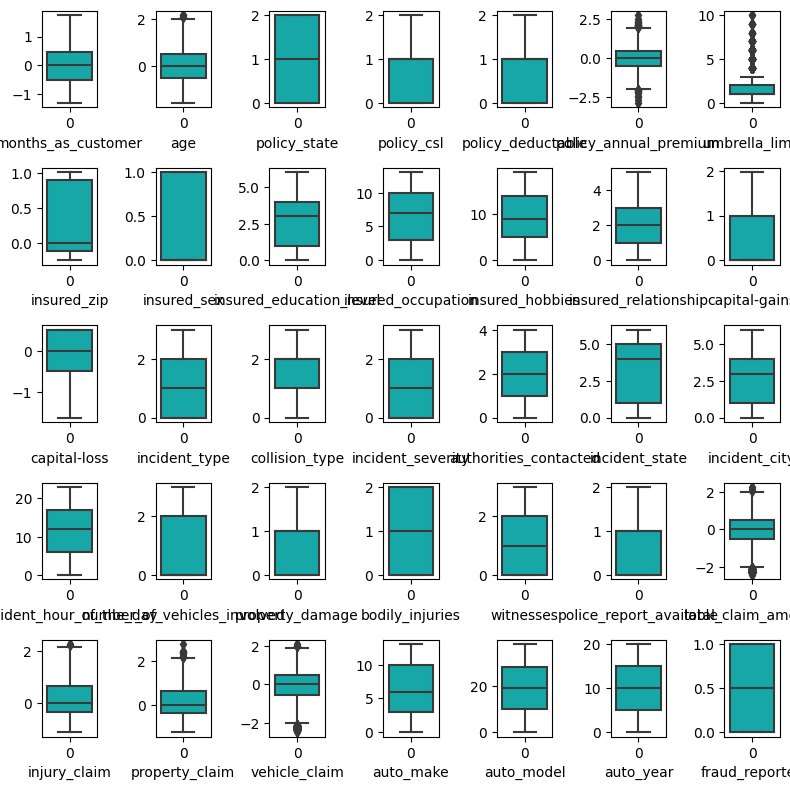

In [166]:
# Visualize outliers using Box-Plot

mp.figure(figsize=(8,8))
pnum = 1

for index in df_ins_bal.columns.to_list():
  if(pnum<=35):
    ax = mp.subplot(5,7, pnum)
    sns.boxplot(df_ins_bal[index], color = 'c')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

**Few outliers can be seen**

(1478, 35)
(1478, 35)


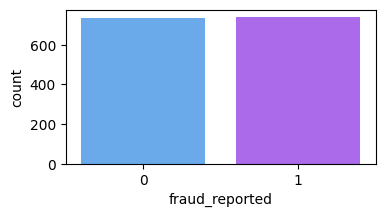

1    741
0    737
Name: fraud_reported, dtype: int64


,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
632,-0.593301,-0.500000,2,2,1,-0.065138,1,-0.085167,1,0,...,2,0,-2.234129,-1.042661,-1.064471,-2.282671,6,8,17,0
843,-0.338118,-0.416667,1,0,1,-0.782447,1,0.987599,0,3,...,0,1,0.166524,-0.003131,-0.026209,0.362954,0,33,19,0
5,0.325359,0.083333,2,1,1,0.328059,1,0.078410,0,6,...,2,1,0.174684,-0.111155,-0.142131,0.453786,10,3,8,1


In [167]:
# Removing Outliers where |Z-score| > 3
# With fraud_reported as target

df_ins_ft = df_ins_bal[::-1]
df_ins_tg = df_ins_bal['fraud_reported']

df_ins_fil = df_ins_bal[(np.abs(sp.zscore(df_ins_ft)) <= 3).all(axis=1)]
df_ins_fil.reset_index(drop=True, inplace=True)


print(df_ins_fil.shape)
print(df_ins_fil.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_ins_fil['fraud_reported'], palette = 'cool')
mp.show()

print(df_ins_fil['fraud_reported'].value_counts())
df_ins_fil.sample(3)

*Outliers have been removed, data is close to balanced*

# GRAPHICAL ANALYSIS - BIVARIATE

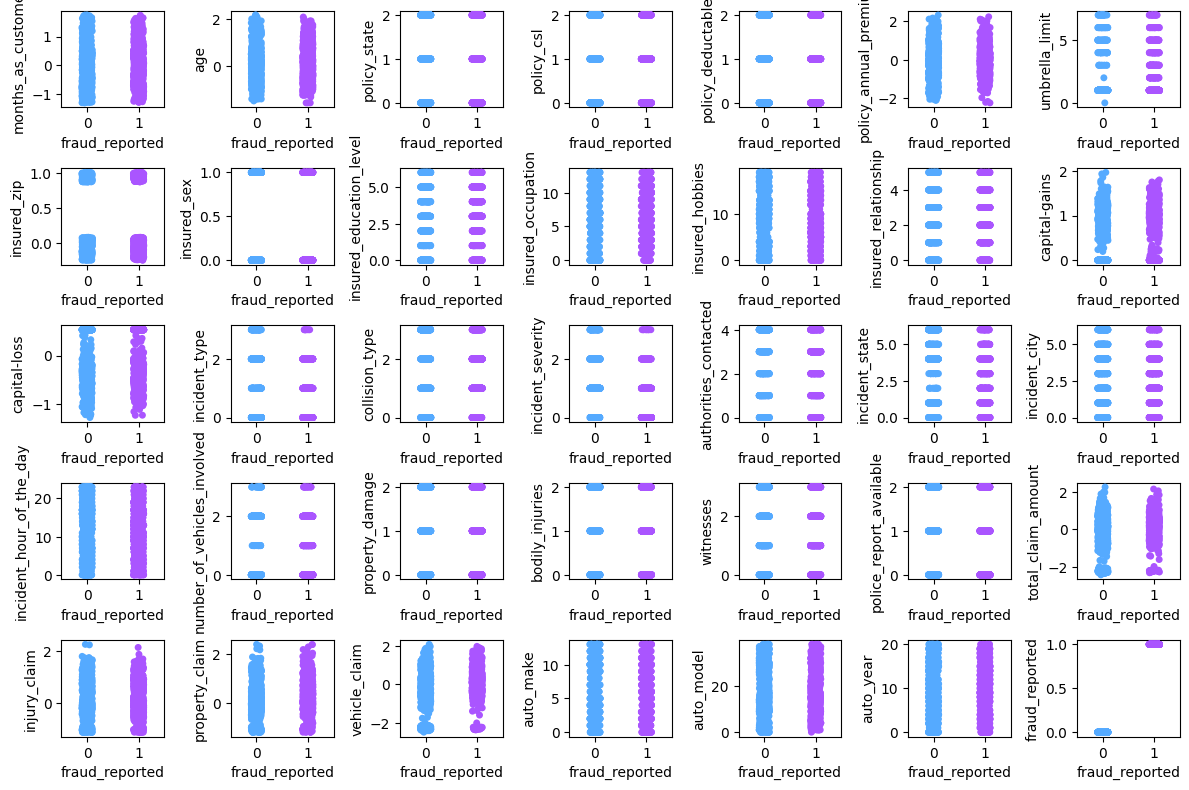

In [168]:
# Stripplpt wrt fraud_reported

mp.figure(figsize=(12,8))
pnum = 1

for index in df_ins_fil.columns.to_list():
  if(pnum<=35):
    ax = mp.subplot(5,7, pnum)
    sns.stripplot(x=df_ins_fil['fraud_reported'], y =df_ins_fil[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

for lower Umbrella limit fraud reported yes is none

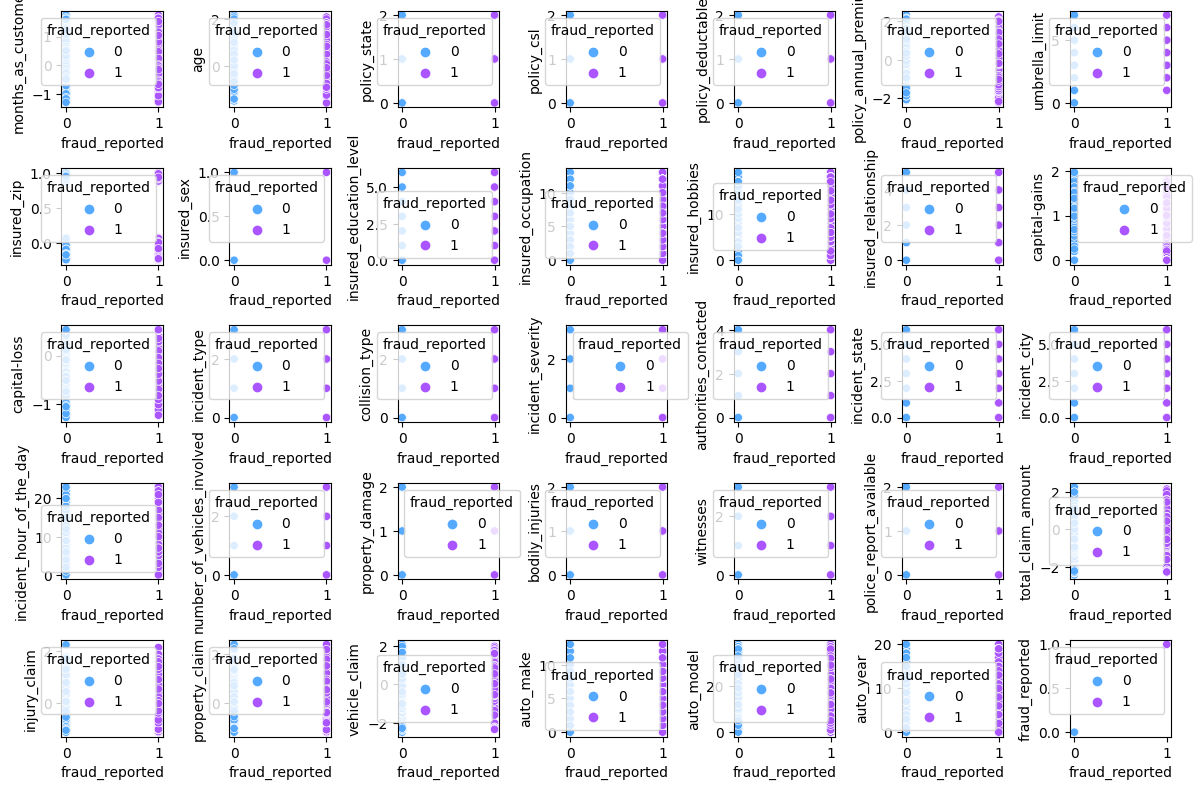

In [169]:
# Scatterplot wrt fraud_reported

mp.figure(figsize=(12,8))
pnum = 1

for index in df_ins_fil.columns.to_list():
  if(pnum<=35):
    ax = mp.subplot(5,7, pnum)
    sns.scatterplot(x=df_ins_fil['fraud_reported'], y =df_ins_fil[index], palette = 'cool', hue = df_ins_fil['fraud_reported'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

# GRAPHICAL ANALYSIS: MULTIVARIATE

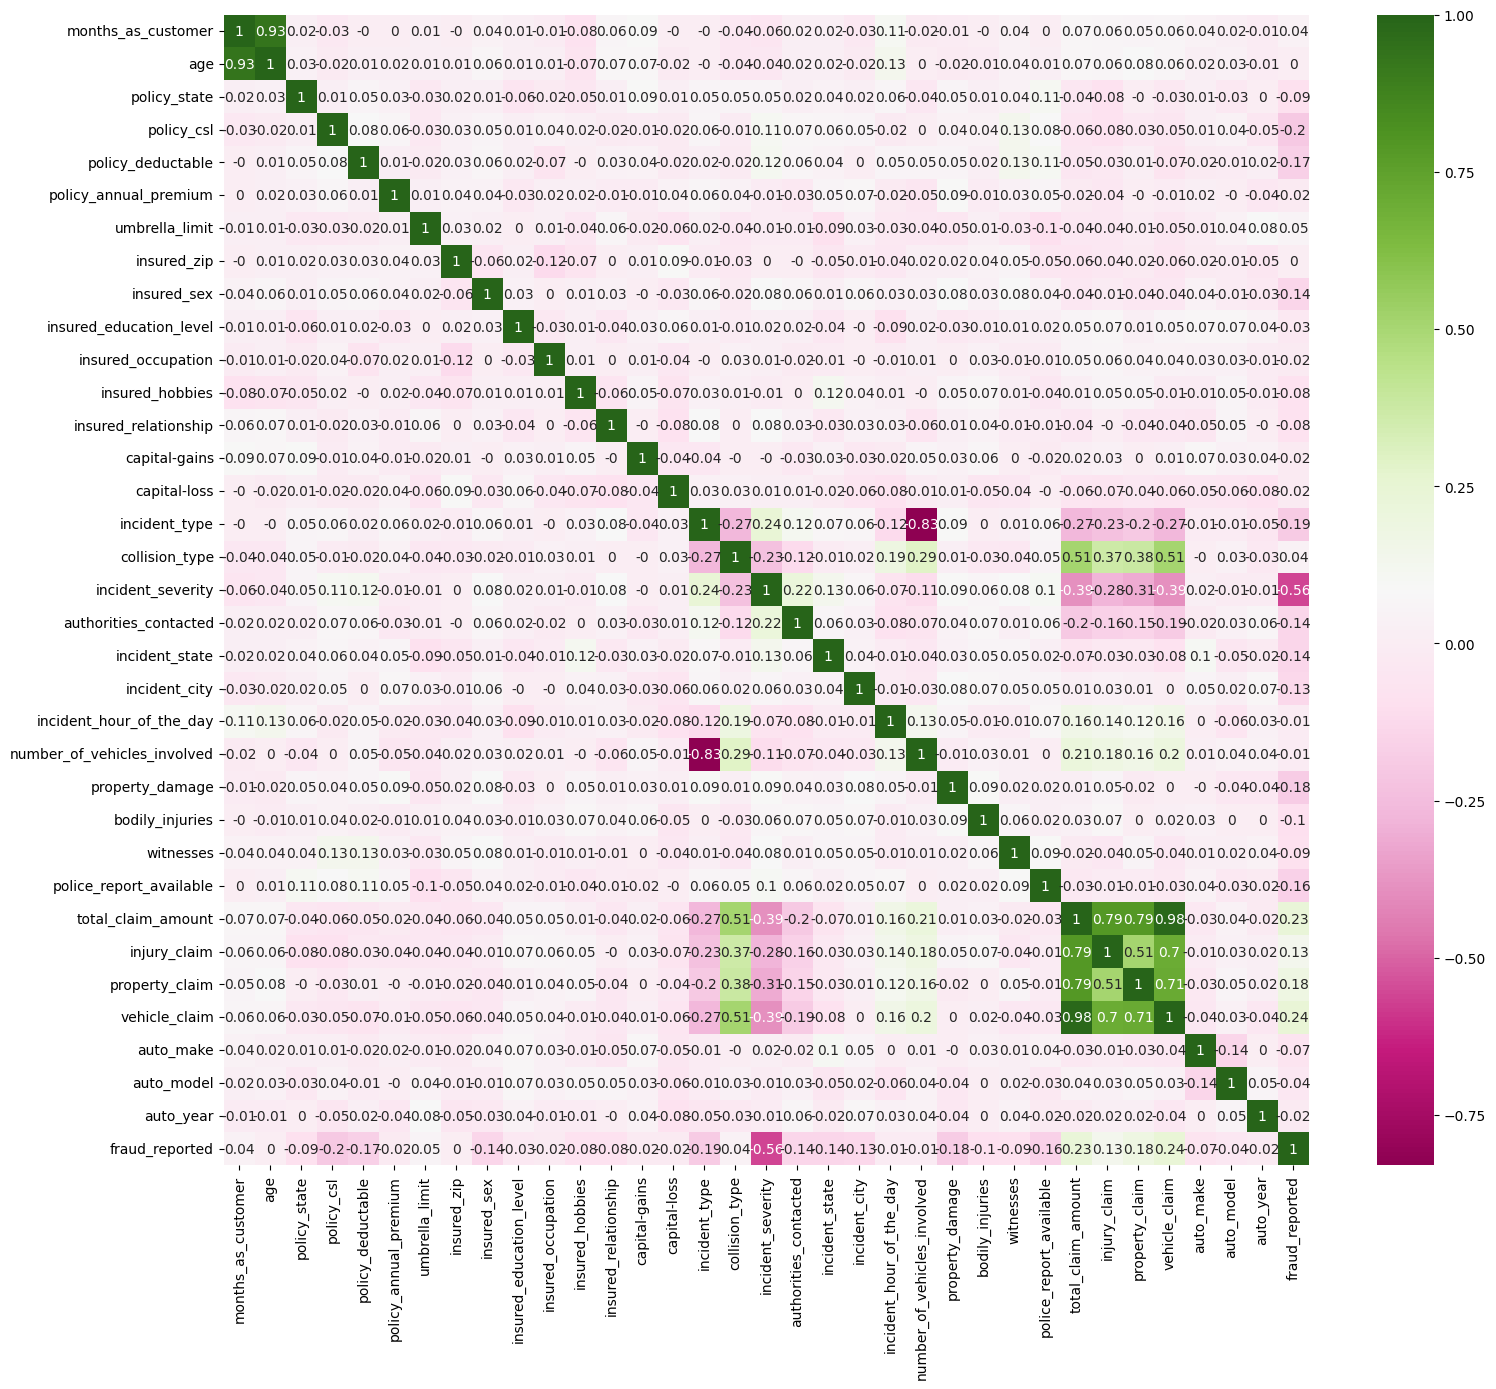

In [170]:
mp.figure(figsize=(16,14))
sns.heatmap(round(df_ins_fil.corr(),2), cmap = 'PiYG', annot = True)
mp.tight_layout()
mp.show()

Strong +ve  Correlation between property_claim, vehicl_claim, total_claim, injury_claim

-ve coreelation in incident Severity & fraud Reported

Strong -ve correlation between number of vehicles involved & collision type

In [171]:
# CHECKING MULIT-COLLINEARITY USING VIF

# Checking VIF

# Separating Target label Avg Price
df_ins_vf = df_ins_fil.iloc[:,:-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_ins_fil.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_ins_fil.values,i) for i in range(len(df_ins_fil.columns))]

vif

,Feature,VIF Val
0,months_as_customer,7.888870
1,age,7.997992
2,policy_state,2.517442
3,policy_csl,2.302961
4,policy_deductable,2.337184
5,policy_annual_premium,1.044733
6,umbrella_limit,2.332319
7,insured_zip,1.306760
8,insured_sex,1.749356
9,insured_education_level,3.640858


In [172]:
# HIGH VIF in total_claim_amount dropping the label

# Remove Collinearity by dropping High VIF label

df_ins_vf.drop('total_claim_amount', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_ins_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_ins_vf.values,i) for i in range(len(df_ins_vf.columns))]

vif

,Feature,VIF Val
0,months_as_customer,7.858953
1,age,7.959476
2,policy_state,2.476703
3,policy_csl,2.261629
4,policy_deductable,2.309651
5,policy_annual_premium,1.040721
6,umbrella_limit,2.245963
7,insured_zip,1.284654
8,insured_sex,1.744268
9,insured_education_level,3.484202


**VIF is now within acceptable Limits**

# MODELLING

In [173]:
# SEPARATE FEATURE & TARGET LABELS
# SEPARATE TRAIN & TEST SAMPLES

In [174]:
# Separate independent & target labels

x_df = df_ins_vf
y_df = df_ins_fil['fraud_reported']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


print(x_df.shape)
print(y_df.shape)

print(x_df.sample(3))
print(y_df.sample(3))

(1478, 33)
(1478,)
      months_as_customer       age  policy_state  policy_csl  \
1351            0.006380  0.333333             2           0   
109            -0.236045 -0.500000             1           0   
324            -0.695375 -0.666667             2           0   

      policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
1351                  0              -0.851457               1    -0.199318   
109                   1              -0.693944               1    -0.089424   
324                   0               0.496897               6    -0.114461   

      insured_sex  insured_education_level  ...  property_damage  \
1351            0                        5  ...                1   
109             1                        4  ...                0   
324             1                        1  ...                0   

      bodily_injuries  witnesses  police_report_available  injury_claim  \
1351                1          0                        1  

# RANDOM FOREST CLASSIFIERS

In [175]:
# HYPERTUNING PARAMETERS

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 4, 'random_state': 99}


In [176]:
# Training the RFC Model with given best hypertuning parameters

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

rst_rfc = max_rand_st

print('Best Random State:', rst_rfc, 'with accuracy score:', max_acc)

Best Random State: 67 with accuracy score: 0.9155405405405406


# EXTRA TREES CLASSIFIERS



In [177]:
# Hypertuning Parameters

from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 10, 'min_samples_split': 9, 'random_state': 36}


In [178]:
# Training the ETC  Model with given best hypertuning parameters
ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

rst_etc = max_rand_st
print('Best Random State:', rst_etc, 'with accuracy score:', max_acc)


Best Random State: 98 with accuracy score: 0.8581081081081081


# DECISION TREE CLASSIFIER

In [179]:
# Hypertuning Parameters

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 10, 'random_state': 34}


In [180]:
# Training the DTC  Model with given best hypertuning parameters
DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'], min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

rst_dtc = max_rand_st
print('Best Random State:', rst_dtc, 'with accuracy score:', max_acc)

Best Random State: 44 with accuracy score: 0.8445945945945946


# KNN MODEL

In [181]:
# Hypertuning Parameters

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 3}


In [182]:
# Training KNN Model

max_acc = 0
max_rand_st = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

rst_knc = max_rand_st
print('Best Random State:', rst_knc, 'with accuracy score:', max_acc)

Best Random State: 48 with accuracy score: 0.8243243243243243


# SVC

In [183]:
# Hypertuning Parameters

from sklearn.svm import SVC

svc = SVC()
param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

samples = 8
randomCV = RandomizedSearchCV(svc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_svc = randomCV.best_params_

{'kernel': 'poly', 'gamma': 0.1, 'C': 1}


In [184]:
# Training SVC Model

max_acc = 0
rst_sv = 0
SV = SVC(C = bp_svc['C'], kernel = bp_svc['kernel'], gamma = bp_svc['gamma'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  SV.fit(x_train, y_train)
  pred = SV.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_sv = i

print('Best Random State:', rst_sv, 'with accuracy score:', max_acc)

Best Random State: 7 with accuracy score: 0.8581081081081081


# ADABOOST CLASSIFIERS

In [185]:
# Hypertuning Parameters

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

rst_abc = max_rand_st
bp_abc = randomCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 5, 'n_estimators': 32, 'random_state': 90}


In [186]:
# Training ABC Model

max_acc = 0
max_rand_st = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

  rst_sv = max_rand_st

print('Best Random State:', rst_sv, 'with accuracy score:', max_acc)

Best Random State: 66 with accuracy score: 0.8378378378378378


**Checking CV Scores of the models**

In [187]:
# Checking CV Score

from sklearn.model_selection import cross_val_score

cv = 5
model_list = [RFC, ETC, KNN, SV, ABC]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', round(cvs.mean(),4))
  print('\n')

RandomForestClassifier(criterion='entropy', max_features=9, min_samples_split=4,
                       random_state=99) : Avg CV Score is  0.8647


ExtraTreeClassifier(max_depth=4, max_features=10, min_samples_split=9,
                    random_state=36) : Avg CV Score is  0.7862


KNeighborsClassifier(n_neighbors=3, p=1) : Avg CV Score is  0.7599


SVC(C=1, gamma=0.1, kernel='poly') : Avg CV Score is  0.8039


AdaBoostClassifier(learning_rate=5, n_estimators=32, random_state=90) : Avg CV Score is  0.7937




**Based on accuracy score and avg CV score, RandomForestClassifier Model is selected**

In [188]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

RFC_SEL = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = rst_rfc, test_size = 0.2)
RFC_SEL.fit(x_train, y_train)
pred = RFC_SEL.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')


Accuracy of the Model: 0.9155


Confusion Matrix: 
 [[141  19]
 [  6 130]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       160
           1       0.87      0.96      0.91       136

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296





# AUC-ROC Curve

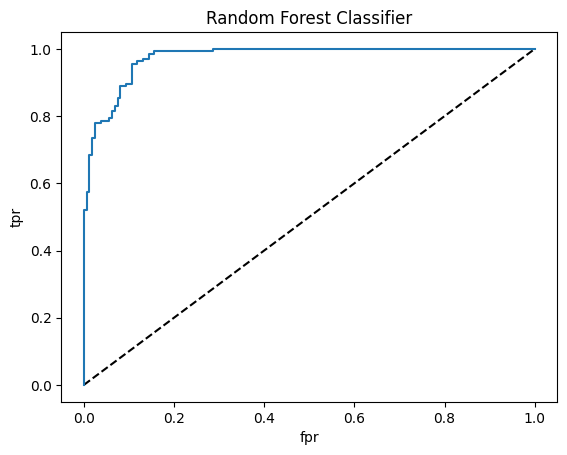

In [189]:
# Checking AUC-ROC Curve


y_pred_prob = RFC_SEL.predict_proba(x_test)[:, 1]

# 0 & others

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 1)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Random Forest Classifier')
mp.plot(fpr,tpr)
mp.show()

# Saving the best Model

In [190]:
import joblib

joblib.dump(RFC_SEL, 'RFC_IFD.pkl')

['RFC_IFD.pkl']

In [191]:
# Load the saved model

load_RFC_IFD = joblib.load('RFC_IFD.pkl')

RFC_IFD = load_RFC_IFD

In [192]:
# Function to Predict Fraud

def pred_ifd(input):

  inp = np.array(input)
  type_ifd  =  RFC_IFD.predict(inp.reshape(1, -1))
  reg_ifd_lst = le.inverse_transform(type_ifd)
  pred_lst = [type_ifd, reg_ifd_lst]

  return pred_lst

In [194]:
rws = [23, 342, 167, 365]

for row in rws:
  print('Actual:', y_df[row])
  print('Predicted by Model:', pred_ifd(x_df.iloc[row,:])[0])
  print('Decoded value:', pred_ifd(x_df.iloc[row,:])[1])
  print('\n')

Actual: 1
Predicted by Model: [1]
Decoded value: ['Y']


Actual: 0
Predicted by Model: [0]
Decoded value: ['N']


Actual: 0
Predicted by Model: [0]
Decoded value: ['N']


Actual: 0
Predicted by Model: [0]
Decoded value: ['N']




**MODEL SEEMS TO BE WORKING WELL**